In [1]:
import matplotlib.pyplot as plt
import numpy as np
import poppy
import astropy.units as u
import astropy.constants as c

%matplotlib widget

0.046875 m
(683, 683)


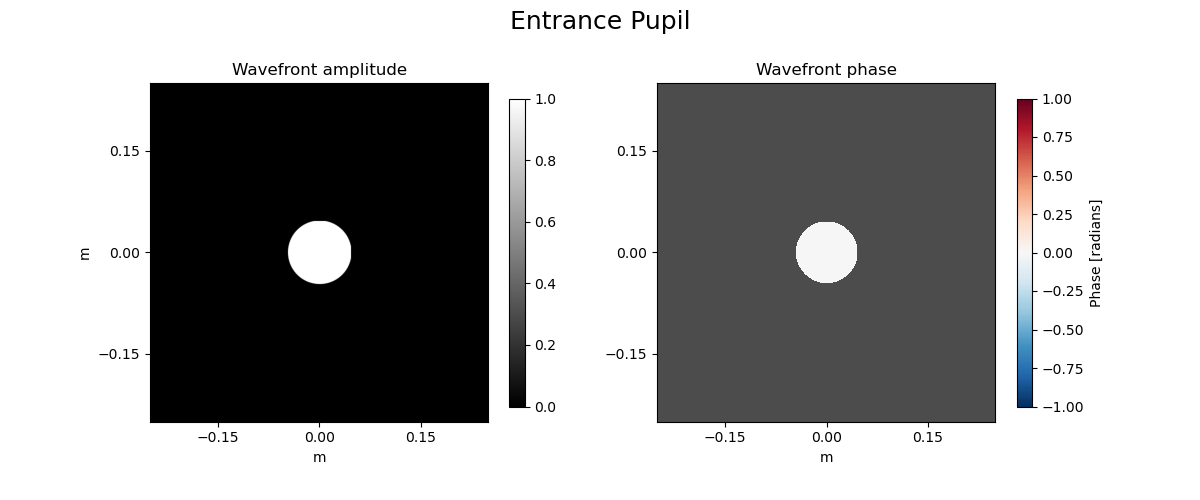

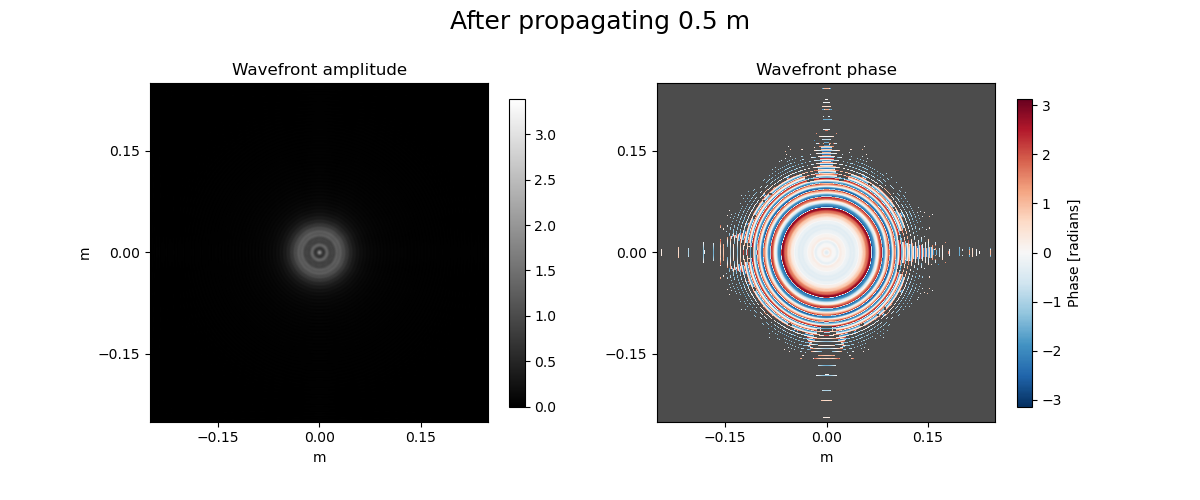

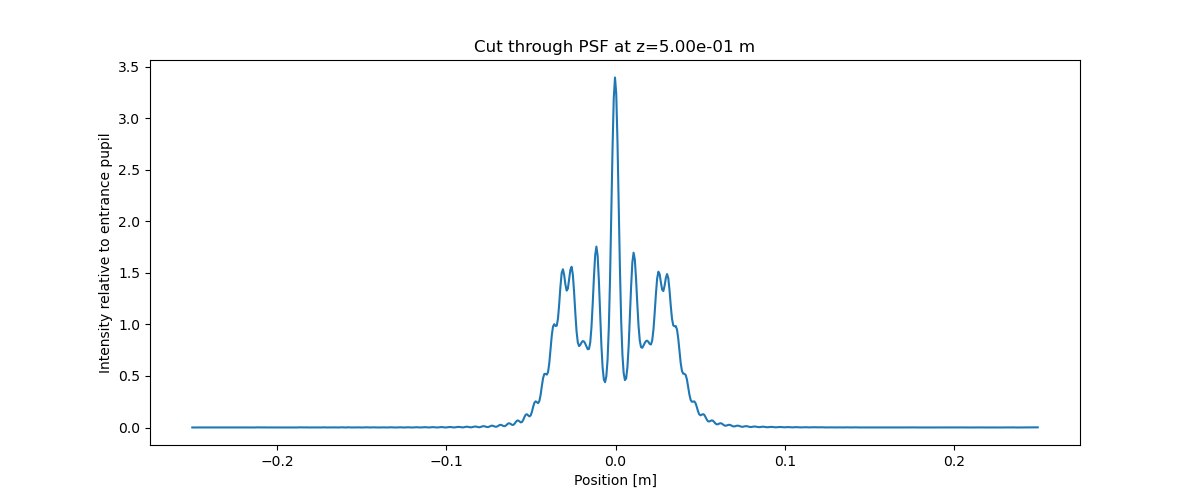

In [2]:
plt.close('all')
npix = 128
pupil_radius = u.m * 0.046875

print(pupil_radius)
lambd = 922. * u.micron

# define wavefront
wf = poppy.FresnelWavefront(pupil_radius, wavelength=lambd, npix=npix, oversample=(5 + 1/3))
# define entrance pupil
wf *= poppy.CircularAperture(radius=pupil_radius)

plt.figure(figsize=(12,5))
wf.display('both',colorbar=True, showpadding=True)
plt.suptitle("Entrance Pupil", fontsize=18)

z = .5 * u.m
wf.propagate_fresnel(z)

plt.figure(figsize=(12,5))
wf.display('both',colorbar=True, vmax_wfe=np.pi)
plt.suptitle("After propagating {}".format(z), fontsize=18)
ax0 = plt.gca()

plt.figure(figsize=(12,5))
y, x = wf.coordinates()
plt.plot(x[wf.intensity.shape[1]//2,:], wf.intensity[wf.intensity.shape[1]//2,:], label='POPPY')
plt.title("Cut through PSF at z={:0.2e}".format(z))
plt.xlabel('Position [m]')
plt.ylabel('Intensity relative to entrance pupil')
ax1 = plt.gca()

print(wf.intensity.shape)

Load test data: propagation of a disk aperture along some arbitrary axis to a flat plane aligned with the source plane.

In [ ]:
data = np.load('arb_angle_results.npz')
xx_img = data['xx_img']
yy_img = data['yy_img']
dest_prime = data['dest_prime']
fresnel_img = data['fresnel_img']
intensity = np.abs(fresnel_img) ** 2.
dest_prime_grid = dest_prime.reshape((xx_img.shape[0], xx_img.shape[1], 3))

stride = 1
fig, axes = plt.subplots(figsize=(12,5), nrows=1, ncols=2)
im = axes[0].pcolormesh(
    xx_img[::stride, ::stride],
    yy_img[::stride, ::stride],
    intensity[::stride, ::stride],
    cmap='Greys_r'
)
fig.colorbar(im, ax=axes[0])
axes[0].set_aspect('equal')
axes[0].set_xlim(ax0.get_xlim())
axes[0].set_ylim(ax0.get_ylim())

im = axes[1].pcolormesh(
    xx_img[::stride, ::stride],
    yy_img[::stride, ::stride],
    np.angle(fresnel_img[::stride, ::stride]),
    cmap='RdBu_r'
)
fig.colorbar(im, ax=axes[1])
axes[1].set_aspect('equal')
axes[0].set_xlim(ax0.get_xlim())
axes[0].set_ylim(ax0.get_ylim())

ax1.plot(xx_img[intensity.shape[1]//2,:], intensity[intensity.shape[1]//2,:], label='This work')
ax1.legend(loc='best')

print(intensity.shape)

In [ ]:
fig, axes = plt.subplots(figsize=(12,5), nrows=1, ncols=2)
im = axes[0].pcolormesh(
    xx_img[::stride, ::stride],
    yy_img[::stride, ::stride],
    (wf.intensity - intensity[::stride, ::stride]),
    cmap='Greys_r'
)
fig.colorbar(im, ax=axes[0])
axes[0].set_aspect('equal')
axes[0].set_xlim(ax0.get_xlim())
axes[0].set_ylim(ax0.get_ylim())

im = axes[1].pcolormesh(
    xx_img[::stride, ::stride],
    yy_img[::stride, ::stride],
    wf.phase - np.angle(fresnel_img[::stride, ::stride]),
    cmap='RdBu_r'
)
fig.colorbar(im, ax=axes[1])
axes[1].set_aspect('equal')

In [ ]:
plt.figure(figsize=(12,5))
frac_diff = (intensity[intensity.shape[1] // 2,:] - wf.intensity[wf.intensity.shape[1] // 2,:]) / wf.intensity[wf.intensity.shape[1] // 2,:]
mask = intensity[intensity.shape[1] // 2,:] < intensity[intensity.shape[1] // 2,:].max() / 100.
frac_diff[mask] = 0.
plt.plot(xx_img[intensity.shape[1]//2,:], np.abs(frac_diff))
plt.title('Fractional Difference')
plt.xlabel('Position [m]')
plt.ylabel('Intensity relative to entrance pupil')
plt.gca().set_xlim(ax1.get_xlim());